<a href="https://colab.research.google.com/github/DipendraBhatta/GUI_BasedHealthManagement/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install the Kaggle package (used to access datasets from Kaggle)
!pip install kaggle

# Import the warnings module to suppress unnecessary warnings
import warnings

# Ignore all warnings to keep the output clean
warnings.filterwarnings("ignore")



In [4]:
# Import the files module from Colab to upload files from local storage
from google.colab import files

# Upload the kaggle.json file, which contains your API credentials
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deependrabhatt","key":"041429b8a1b21cd1b72336c00e15a9a2"}'}

In [5]:
# Create a hidden folder for Kaggle API credentials (if it doesn't already exist)
!mkdir -p ~/.kaggle

# Copy the uploaded kaggle.json file to the Kaggle directory
!cp kaggle.json ~/.kaggle/

# Set correct permissions for the kaggle.json file to protect API credentials
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
# to list all datasets in kaggle
!kaggle datasets list

ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/student-depression-dataset                           Student Depression Dataset                              467020  2025-03-13 03:12:30.423000          11999        173  1.0              
atharvasoundankar/chocolate-sales                                Chocolate Sales Data 📊🍫                                  14473  2025-03-19 03:51:40.270000          21043        348  1.0              
atharvasoundankar/spotify-global-streaming-data-2024             🎧 Spotify Global Streaming Data (2024)                   14109  2025-04-07 06:26:31.707000           1391         24  1.0          

In [7]:
# Install the opendatasets library (if not already installed)
!pip install opendatasets

# Import opendatasets to download Kaggle datasets easily
import opendatasets as od

# Download the Brain Tumor MRI dataset from Kaggle
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data")


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


In [8]:
# Import NumPy for numerical computations
import numpy as np

# Import os for file and directory management operations
import os

# Import Matplotlib for data visualization (plotting graphs and images)
import matplotlib.pyplot as plt

# Import math for mathematical functions like sqrt, log, sin, etc.
import math

# Import shutil for file operations (moving, copying, deleting files)
import shutil

# Import glob to search for file paths using wildcard patterns (e.g., "*.jpg")
import glob


In [9]:
# Define the root directory where the dataset is stored
ROOT_DIR = "/content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

# Dictionary to store the count of images in each category
number_of_images = {}

# Loop through each folder (class) in the dataset directory
for dir in os.listdir(ROOT_DIR):
    # Count the number of images in the folder
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Display the number of images in each class
number_of_images.items()



dict_items([('yes', 155), ('no', 98)])

### **We will split the data such that**
    * 70% for Train Data
    * 15% for validation
    * 15% for Testing

In [10]:

# Define dataset path
ROOT_DIR = "/content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

# Define split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Create dictionaries to store image counts
number_of_images = {}

# Get number of images in each class (0 - Brain Tumor, 1 - Healthy)
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Print number of images in each class
print("Total images per class:", number_of_images)

# Create train, validation, and test folders if they don't exist
for folder in ["train", "validation", "test"]:
    os.makedirs(folder, exist_ok=True)

for dir in os.listdir(ROOT_DIR):
    # Create class subfolders inside train, validation, and test
    for folder in ["train", "validation", "test"]:
        os.makedirs(os.path.join(folder, dir), exist_ok=True)

    # Get list of all images in the class directory
    images = np.array(os.listdir(os.path.join(ROOT_DIR, dir)))

    # Shuffle images randomly
    np.random.shuffle(images)

    # Compute number of images for each split
    train_size = math.floor(train_ratio * number_of_images[dir])
    val_size = math.floor(val_ratio * number_of_images[dir])

    # Split images into train, validation, and test sets
    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    # Move images to respective folders
    for img, folder in zip([train_images, val_images, test_images], ["train", "validation", "test"]):
        for image in img:
            src_path = os.path.join(ROOT_DIR, dir, image)
            dest_path = os.path.join(folder, dir, image)
            shutil.move(src_path, dest_path)

print("Dataset successfully split into Train, Validation, and Test sets!")




Total images per class: {'yes': 155, 'no': 98}
Dataset successfully split into Train, Validation, and Test sets!


In [11]:
# Import necessary libraries from Keras
import keras
# Import specific layers for building a Convolutional Neural Network (CNN)
from keras.layers import Conv2D, Dropout, Flatten, MaxPool2D, Dense, BatchNormalization, GlobalMaxPool2D
# Import Sequential model for constructing the neural network
from keras.models import Sequential
# Import image preprocessing utilities
from keras.preprocessing.image import load_img, img_to_array


In [12]:
# Initialize the Sequential model
model = Sequential()

# Input Layer (Corrected input size to 224x224)
# The first convolutional layer, using 16 filters, kernel size of 3x3, ReLU activation function,
# and defining the input shape as (224, 224, 3) for RGB images
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

# Convolutional and Pooling Layers
# Second convolutional layer with 36 filters, followed by a MaxPooling layer to reduce the spatial dimensions
model.add(Conv2D(36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Third convolutional layer with 64 filters, followed by MaxPooling
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Fourth convolutional layer with 128 filters, followed by MaxPooling
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Dropout layer to prevent overfitting by randomly setting a fraction of input units to zero during training
model.add(Dropout(rate=0.25))

# Flattening before passing to fully connected layers
# Flatten the 3D output of the convolutional layers into a 1D array for the fully connected layers
model.add(Flatten())

# Fully Connected Layers
# First fully connected (Dense) layer with 64 units and ReLU activation
model.add(Dense(units=64, activation='relu'))

# Dropout layer again to prevent overfitting
model.add(Dropout(rate=0.25))

# Output Layer (Binary Classification)
# The output layer has 1 unit for binary classification (0 or 1), with a sigmoid activation function
# Sigmoid outputs a probability between 0 and 1
model.add(Dense(units=1, activation='sigmoid'))

# Model Summary
# Print the summary of the model to check the architecture details such as number of parameters in each layer
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer is used for efficient gradient descent
    loss='keras.losses.binary_crossentropy',  # Binary cross-entropy loss function for binary classification
    metrics=['accuracy']  # Accuracy metric to evaluate the model's performance during training
)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocessingImage1(path):
    """
    Input  : Path to the dataset directory
    Output : Preprocessed image generator
    """
    # Initialize the ImageDataGenerator for data augmentation and preprocessing
    image_data = ImageDataGenerator(
        zoom_range=0.2,            # Randomly zoom the image within a range of 20%
        shear_range=0.2,           # Randomly apply shearing transformation on the image
        rescale=1/255,             # Rescale pixel values to the range [0, 1] by dividing by 255
        horizontal_flip=True       # Randomly flip the images horizontally for augmentation
    )

    # Flow images from the directory, apply transformations, and resize them to (224, 224)
    image = image_data.flow_from_directory(
        directory=path,           # Directory containing the dataset (folder structure for classes)
        target_size=(224, 224),   # Resize images to 224x224, the expected input size for the model
        batch_size=32,            # Set the batch size to 32 (number of images per batch)
        class_mode='binary'       # Binary classification (only two classes, e.g., tumor vs healthy)
    )

    # Return the preprocessed image generator for use in training
    return image  # The generator will yield batches of augmented images for training


**Preparing our data Using Data Generator**

In [15]:
# Specify the path to the training data directory
path = "/content/train"

# Call the preprocessingImage1 function to load and preprocess the images
train_data = preprocessingImage1(path)


Found 176 images belonging to 2 classes.


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocessingImage2(path):
    """
    Input  : Path to the dataset directory
    Output : Preprocessed image generator
    """
    # Initialize the ImageDataGenerator for image preprocessing and augmentation
    image_data = ImageDataGenerator(
        rescale=1/255,              # Rescale pixel values to [0, 1] range by dividing by 255
        horizontal_flip=True        # Randomly flip images horizontally to augment the dataset
    )

    # Load images from the directory, apply transformations, and resize them to (224, 224)
    image = image_data.flow_from_directory(
        directory=path,            # Path to the dataset directory (expects class subfolders)
        target_size=(224, 224),    # Resize all images to 224x224 (input size for models like VGG16, ResNet)
        batch_size=32,             # Set the batch size to 32 (number of images per batch)
        class_mode='binary'        # Binary classification (only two classes: tumor vs healthy)
    )

    # Return the preprocessed image generator to be used during model training
    return image  # The generator will yield batches of augmented and preprocessed images


In [17]:
# Specify the path to the test data directory
path = "/content/test"

# Call the preprocessingImage2 function to load and preprocess the test images
test_data = preprocessingImage2(path)


Found 40 images belonging to 2 classes.


In [18]:
# Specify the path to the validation data directory
path = "/content/validation"

# Call the preprocessingImage2 function to load and preprocess the validation images
val_data = preprocessingImage2(path)


Found 37 images belonging to 2 classes.


In [19]:
# Importing necessary callbacks for model training
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping to avoid overfitting and unnecessary training
es = EarlyStopping(
    monitor='val_accuracy',  # Monitor the validation accuracy to stop training if no improvement
    min_delta=0.01,           # Minimum change in the monitored value to qualify as an improvement
    patience=5,               # Stop training if no improvement in validation accuracy for 5 consecutive epochs
    verbose=1,                # Print messages when early stopping is triggered
    mode='auto'               # Automatically determine whether to minimize or maximize the metric (accuracy is maximized)
)

# Model checkpoint to save the best model during training
mc = ModelCheckpoint(
    filepath="/content/bestmodel.h5",   # Path where the best model will be saved
    verbose=1,                          # Print messages when the best model is saved
    save_best_only=True,                # Save only the best model based on the monitored metric
    mode='auto'                         # Automatically determine the mode based on the metric being monitored
)

# List of callbacks to be used during model training
cd = [es, mc]  # Combining early stopping and model checkpoint into a list




In [20]:
# Compile the model before training
# We use the Adam optimizer, binary crossentropy as the loss function (for binary classification),
# and track accuracy as the metric for evaluating the model's performance.
model.compile(
    optimizer='adam',               # Optimizer chosen for training, Adam is a popular choice for deep learning tasks
    loss='binary_crossentropy',      # Loss function for binary classification
    metrics=['accuracy']            # Metrics to track during training (accuracy in this case)
)

# Train the model
hs = model.fit(
    train_data,                     # Training dataset generator
    steps_per_epoch=8,              # Number of steps (batches) to run per epoch (based on batch size and dataset size)
    epochs=30,                      # Total number of epochs to train the model for
    verbose=1,                      # Display progress information during training
    validation_data=val_data,       # Validation dataset generator for validation during training
    validation_steps=16,            # Number of validation steps per epoch
    callbacks=cd                    # Pass in the callback list (early stopping and model checkpoint)
)

# Custom Message after training
# Get highest validation accuracy achieved during training
best_val_accuracy = max(hs.history['val_accuracy'])  # Extract the maximum validation accuracy from the history

# Print custom message
# Display the highest validation accuracy achieved and inform the user where the model is saved
print(f"\nTraining complete! Highest validation accuracy achieved: {best_val_accuracy:.4f}")
print(f"Model is saved to '/content/bestmodel.h5' if validation accuracy was improved.")


Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.4979 - loss: 0.8382 
Epoch 1: val_loss improved from inf to 0.64268, saving model to /content/bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5112 - loss: 0.8303 - val_accuracy: 0.6216 - val_loss: 0.6427
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.6843 - loss: 0.5927 
Epoch 2: val_loss did not improve from 0.64268
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.6865 - loss: 0.5941 - val_accuracy: 0.5946 - val_loss: 0.6538
Epoch 3/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.7468 - loss: 0.5432
Epoch 3: val_loss did not improve from 0.64268
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7391 - loss: 0.5497 - val_accuracy: 0.6216 - val_loss: 0.6996
Epoch 4/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.7404 - loss: 0.5423 
Epoch 4: val_loss improved from 0.64268 to 0.63316, saving model to /content/bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.7443 - loss: 0.5387 - val_accuracy: 0.5946 - val_loss: 0.6332
Epoch 5/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.7538 - loss: 0.5611 
Epoch 5: val_loss improved from 0.63316 to 0.61496, saving model to /content/bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7515 - loss: 0.5659 - val_accuracy: 0.6216 - val_loss: 0.6150
Epoch 6/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.7383 - loss: 0.5013 
Epoch 6: val_loss improved from 0.61496 to 0.56987, saving model to /content/bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7369 - loss: 0.5068 - val_accuracy: 0.6486 - val_loss: 0.5699
Epoch 7/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.7405 - loss: 0.4911 
Epoch 7: val_loss improved from 0.56987 to 0.54438, saving model to /content/bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7443 - loss: 0.4899 - val_accuracy: 0.7027 - val_loss: 0.5444
Epoch 8/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.7314 - loss: 0.5214 
Epoch 8: val_loss improved from 0.54438 to 0.50749, saving model to /content/bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7431 - loss: 0.5120 - val_accuracy: 0.7297 - val_loss: 0.5075
Epoch 9/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.7942 - loss: 0.4254
Epoch 9: val_loss improved from 0.50749 to 0.46835, saving model to /content/bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.7974 - loss: 0.4251 - val_accuracy: 0.7297 - val_loss: 0.4683
Epoch 10/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.8123 - loss: 0.4255 
Epoch 10: val_loss did not improve from 0.46835
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8138 - loss: 0.4259 - val_accuracy: 0.7568 - val_loss: 0.5168
Epoch 11/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.8831 - loss: 0.3594 
Epoch 11: val_loss did not improve from 0.46835
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8654 - loss: 0.3966 - val_accuracy: 0.7838 - val_loss: 0.4862
Epoch 12/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.8064 - loss: 0.4323
Epoch 12: val_loss did not improve from 0.46835
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.7980 - loss: 0.4398 - val_accuracy: 0.6757 - val_loss: 0.5569
Epoch 13/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.8484 - loss: 0.4340 
Epoch 13: val_loss did not improve from 0.46835
8/8 ━━━━━━━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9008 - loss: 0.3448 - val_accuracy: 0.8108 - val_loss: 0.4646
Epoch 17/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.8722 - loss: 0.3224
Epoch 17: val_loss did not improve from 0.46462
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.8744 - loss: 0.3203 - val_accuracy: 0.7838 - val_loss: 0.5619
Epoch 18/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.8321 - loss: 0.3801 
Epoch 18: val_loss did not improve from 0.46462
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.8314 - loss: 0.3792 - val_accuracy: 0.8378 - val_loss: 0.4660
Epoch 19/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.8474 - loss: 0.3888 
Epoch 19: val_loss improved from 0.46462 to 0.44939, saving model to /content/bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.8429 - loss: 0.3904 - val_accuracy: 0.8378 - val_loss: 0.4494
Epoch 20/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.7829 - loss: 0.4214
Epoch 20: val_loss did not improve from 0.44939
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.7903 - loss: 0.4146 - val_accuracy: 0.8108 - val_loss: 0.5001
Epoch 21/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.8951 - loss: 0.2897 
Epoch 21: val_loss did not improve from 0.44939
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.8844 - loss: 0.3011 - val_accuracy: 0.8108 - val_loss: 0.4849
Epoch 22/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.8301 - loss: 0.3742 
Epoch 22: val_loss did not improve from 0.44939
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8342 - loss: 0.3712 - val_accuracy: 0.7568 - val_loss: 0.5331
Epoch 23/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.8447 - loss: 0.3710 
Epoch 23: val_loss did not improve from 0.44939
8/8 ━━━━━━━━━━━━━━━━━━━━

In [21]:
# Extracting history from the training process
# 'hs.history' contains the training progress information, including metrics like accuracy and loss
h = hs.history

# Displaying the available keys (metrics) in the training history
# This will show the keys such as 'accuracy', 'val_accuracy', 'loss', 'val_loss', etc.
h.keys()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Training Accuracy vs Validation Accuracy')

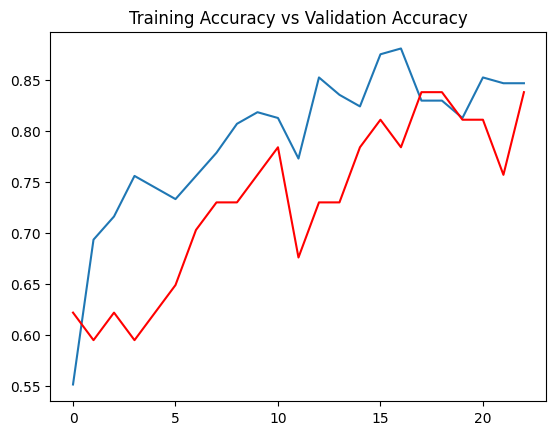

In [22]:
# Plotting the training accuracy ('accuracy') and validation accuracy ('val_accuracy')
# The first plot is the training accuracy, and the second plot is the validation accuracy
plt.plot(h['accuracy'], label='Training Accuracy')  # Plotting training accuracy (blue line)
plt.plot(h['val_accuracy'], c="red", label='Validation Accuracy')  # Plotting validation accuracy (red line)

# Adding a title to the plot
plt.title("Training Accuracy vs Validation Accuracy")


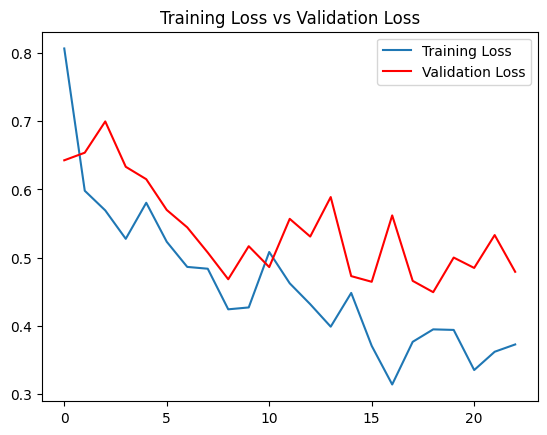

In [23]:
# Plot training and validation loss
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], c="red", label='Validation Loss')

# Title and display plot
plt.title("Training Loss vs Validation Loss")
plt.legend()
plt.show()


In [24]:
# Import the necessary function to load the model
from keras.models import load_model

# Load the best saved model after training
model = load_model("/content/bestmodel.h5")


In [25]:
# Evaluate the model on the test data
acc = model.evaluate(test_data)

# Print the accuracy of the model as a percentage
print(f"The accuracy of the model is {acc[1]*100} %")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.7396 - loss: 0.4671
The accuracy of the model is 75.0 %


In [26]:
from keras.preprocessing.image import load_img, img_to_array


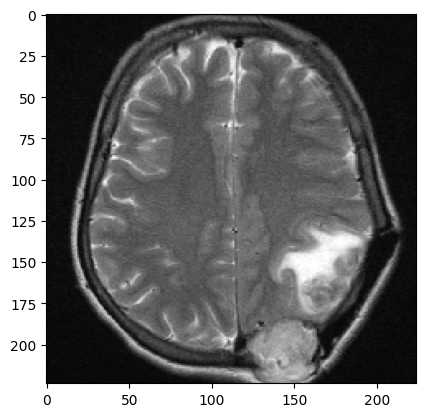

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
0.67016494
The person HAS a brain tumor


In [27]:
# Define the path of the image to be predicted
path = "/content/brain-mri-images-for-brain-tumor-detection/yes/Y102.jpg"

# Load the image and resize it to match model input size (224x224)
img = load_img(path, target_size=(224,224))

# Convert the image to an array and normalize by dividing by 255
input_arr = img_to_array(img) / 255

# Display the image
plt.imshow(img)
plt.show()

# Expand dimensions to match the expected input shape for the model
input_arr = np.expand_dims(input_arr, axis=0)

# Predict the probability of the image belonging to class 'yes' (brain tumor)
pred = model.predict(input_arr)[0][0]

# Print the prediction result
print(pred)

# Check class indices from the training data
train_data.class_indices

# Set a threshold to determine if the prediction indicates a brain tumor or not
threshold = 0.5  # You can adjust based on model performance

# Interpret the prediction based on the threshold
if pred < threshold:
    print("The person does NOT have a brain tumor")  # Class 'no' (0)
else:
    print("The person HAS a brain tumor")  # Class 'yes' (1)
